# Reverse Ecology and Metatranscriptomics of Uncultivated Freshwater Actinobacteria

## Calculating Seed Sets

### Overview of Reverse Ecology

The term reverse ecology refer to a set of computational techniques which aim to infer the ecological traits of an organism directly from its metabolic network. The "flavor" of reverse ecology used in this work relies on the computation of a metabolic network's seed sets, the minimal set of metabolites which must be exogenously acquired for growth. Seed compounds will reveal auxotrophies and biosynthetic capabilities that define metabolic phenotypes for each clade.

Reverse ecology represents metabolic networks as graphs (a type of mathematical object). A graph consists of a set of objects (nodes) that are connected to one another (via edges). Graphs may be directed or undirected. In an undirected graph, a connection from A to B implies a connection from B to A. In a directed graph, edges point from A to B and not vice-versa. Metabolic networks are represented as directed graphs.

#### References
1. Borenstein, E., Kupiec, M., Feldman, M. W., & Ruppin, E. (2008). Large-scale reconstruction and phylogenetic analysis of metabolic environments. Proceedings of the National Academy of Sciences, 105(38), 14482–14487. http://doi.org/10.1073/pnas.0806162105

### Analyzing Metabolic Network Graphs

In graph theory, a connected component of a graph is a subgraph in which all pairs of vertices are connected to each other by paths, and which has no connections to nodes outside the subgraph. 

A graph which has only a single component is fully connected. The graphs algorithms used in reverse ecology analysis require the metabolic network contain a single, fully connected graph. 

The code below computes the connected components of our metabolic network graphs and makes a histogram.

Computing graph statistics


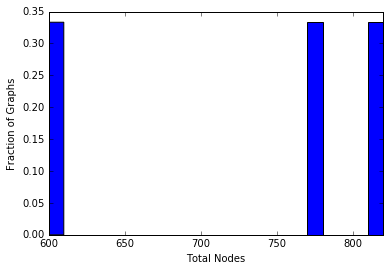

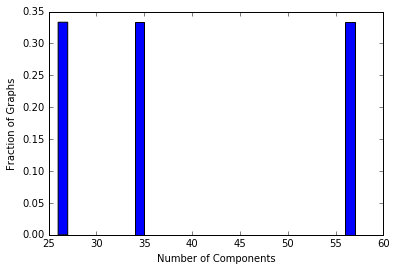

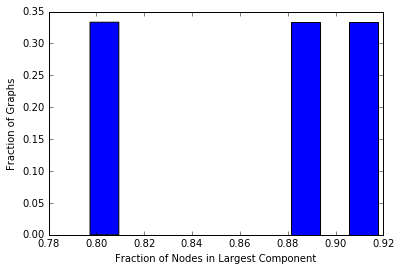

In [6]:
# Import special features for iPython
import sys
sys.path.append('../reFunctions')
import matplotlib
%matplotlib inline

# Import Python modules 
# These custom-written modules should have been included with the package
# distribution. 
from reverseEcology import metadataFunctions as mf
from reverseEcology import graphFunctions as gf

# Define local folder structure for data input and processing.
mergedModelDir = '../models/merged'
summaryStatsDir = '../data/mergedModelStats'

# Import the list of models
dirList = mf.getDirList(mergedModelDir)

graphStatArray, diGraphStatArray = gf.computeGraphStats(dirList, mergedModelDir, summaryStatsDir)
gf.plotGraphStats(graphStatArray)

### Reducing Graphs to Their Largest Component

The third histogram shows that the largest component of each graph contains at least 80% of the metabolites (nodes) in the graph. For ease of analysis, I will perform reverse ecology analysis on the largest component of each graph, discarding the rest. The code below reduces the graph for each clade to its largest component.

In [7]:
# Import special features for iPython
import sys
sys.path.append('../reFunctions')

# Import Python modules 
# These custom-written modules should have been included with the package
# distribution. 
from reverseEcology import metadataFunctions as mf
from reverseEcology import graphFunctions as gf

# Define local folder structure for data input and processing.
mergedModelDir = '../models/merged'
summaryStatsDir = '../data/mergedModelStats'

# Import the list of models
dirList = mf.getDirList(mergedModelDir)

reducedGraphStatArray = gf.reduceToLargeComponent(dirList, mergedModelDir, summaryStatsDir)

Reducing to largest component


#### Computation of Seed Sets

Recall the definition of a seed set: the set of compounds that, based on metabolic network topology, are exogenously acquired for growth. Formally, the seed set of a network is the minimal subset of compounds (nodes) that cannot be synthesized from other compounds in the network, and whose presence in the environment permits the production of all other compounds in the network. In other words, the seed set of a network is a set of nodes from which all other nodes can be reached.

The seed set detection algorithm decomposes the metabolic network into its strongly connected components. This decomposition enables the seed set detection problem to be reduced to the problem of detecting source components in the condensation of the original network.

To find the seed sets, each source component in the condensation is then expanded to its original nodes. Because each vertex of the condensation is an SCC of the original graph, each vertex of the condensation contains a set of "equivalent nodes", meaning that each node can be reached from the others.

Thus, the seed set detection algorithm contains four steps.
1. Identify the SCCs of the (directed) network graph
2. Use the SCCs to derive the condensation of the original graph
3. Identify source components in the condensation
4. Expand each source component of the condensation into its original node

The code below performs the four steps shown above for the metabolic network graph of each genome. The seed compounds for each graph are written to a file, with each line in the file containing a set of equivalent seed compounds. The code also plots histograms of the number and size of the seed sets against network size.

Computing seed sets


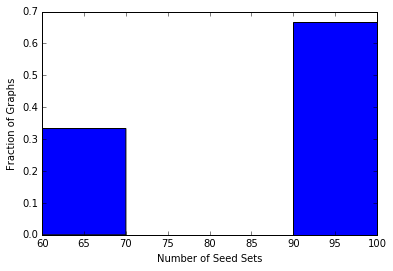

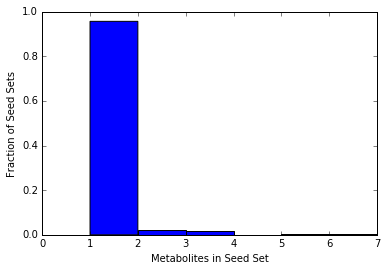

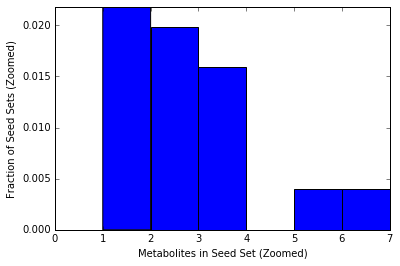

In [8]:
# Import special features for iPython
import sys
sys.path.append('../reFunctions')
import matplotlib
%matplotlib inline

# Import Python modules 
# These custom-written modules should have been included with the package
# distribution. 
from reverseEcology import metadataFunctions as mf
from reverseEcology import graphFunctions as gf

# Define local folder structure for data input and processing.
externalDataDir = '../data/externalData'
mergedModelDir = '../models/merged'
seedDir = '../results/seedCompounds'

# Import the list of models
dirList = mf.getDirList(mergedModelDir)

seedSetList = gf.computeSeedSets(dirList, externalDataDir, mergedModelDir, seedDir)
gf.plotSeedStatsForTribes(seedSetList, reducedGraphStatArray)

#### Working with Seed Sets

Now that the seed sets for each genome have been computed, we want to analyze them. The functions below:
- write a single matrix for seed compounds for all genomes
- compute the fraction of genomes in which each seed compound appears

In [9]:
# Import special features for iPython
import sys
sys.path.append('../reFunctions')

# Import Python modules 
# These custom-written modules should have been included with the package
# distribution. 
from reverseEcology import metadataFunctions as mf
from reverseEcology import seedFunctions as ef

# Define local folder structure for data input and processing.
externalDataDir = '../data/externalData'
seedDir = '../results/seedCompounds'
summaryStatsDir = '../results/seedCompounds'

# Import the list of models
dirList = mf.getDirList(seedDir)

seedMatrixDF = ef.consolidateSeeds(dirList, externalDataDir, seedDir, summaryStatsDir)

Consolidate seed sets
